In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy.optimize import curve_fit
import statistics
from scipy import asarray as ar,exp
from scipy.signal import chirp, find_peaks, peak_widths

In [29]:
#Am241-nFz
An = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Am-241_nFZ2_V150_test.txt", skiprows = 0, unpack = True)
#Am241-pFz
Ap = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Am-241_pFZ_V150_test.txt", skiprows = 0, unpack = True)
#Am241-nMCZ
AnC = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Am-241_nMCz_V150_test.txt", skiprows = 0, unpack = True)
#noise nFz
Abn = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/noise-bkg_nFZ2_V150_test.txt", skiprows = 0, unpack = True)
#noise pFz
Abp = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/noise-bkg_pFZ_V150_test.txt", skiprows = 0, unpack = True)
#noise nMCZ
AbnC= np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/noise-bkg_nMCz_V150_test.txt", skiprows = 0, unpack = True)

mu_right= 344.99537764556226 , Standardfehler= 0.18364853437198167
sig_right= 23.79151604837597 , Standardfehler= 0.19639067107020672
56.024738892391255


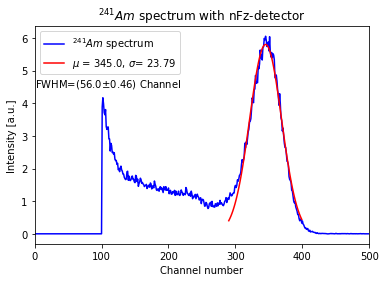

In [46]:
x1=ar(range(1024))
#Am241-nFz minus background noise
A=Abn/300.005000
Ax= An/300.308000
Anr=Ax-A
#n_fehler=np.sqrt(Anr)
def gaussian(x,A,mu, sig):
    return (A/(np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sig**2)))

#popt,pcov = curve_fit(gaussian,x1,Anr,p0=[6,350,1,300,0])
popt,pcov = curve_fit(gaussian,x1[300:400],Anr[300:400],p0=[6,350,1])
#popt1,pcov1 = curve_fit(gaussian,x1[101:110],Anr[101:110],p0=[1250,100,1,300,0],sigma=n_fehler[101:110])
print("mu_right=",popt[1],", Standardfehler=", np.sqrt(pcov[1][1]))
print("sig_right=",popt[2],", Standardfehler=", np.sqrt(pcov[2][2]))
#print("mu_left=",popt1[1],", Standardfehler=", np.sqrt(pcov1[1][1]))
#print("sig_left=",popt1[2],", Standardfehler=", np.sqrt(pcov1[2][2]))
x_k=np.arange(290,400)
#x_k1=np.arange(95,120)
plt.xlim(0,500)
plt.plot(x1,Anr,'b',label=r'$^{241}Am$ spectrum')
plt.plot(x_k,gaussian(x_k,*popt),'r',label=r'$\mu$ = {:1.4}, $\sigma$= {:1.4}'.format(popt[1],popt[2]))
plt.title(r'$^{241}Am$ spectrum with nFz-detector')
plt.xlabel('Channel number')
plt.ylabel('Intensity [a.u.]')
plt.legend(loc='best')
#plt.plot(x_k1,gaussian(x_k1,*popt1),'g',label='fit')
sig=popt[2]
sig_err = np.sqrt(pcov[2][2])
FWHM= 2*np.sqrt(2*np.log(2))*sig
FWHM_err= 2*np.sqrt(2*np.log(2))*sig_err
print(FWHM)
plt.text(x=.2, y=4.5,s=r'FWHM=({:1.3}$\pm${:1.2}) Channel'. format(FWHM,FWHM_err))
#plt.savefig('C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/Am_nFz.pdf', format='pdf')
plt.show()

mu_right= 368.9003329269932 , Standardfehler= 0.16236081133396085
sig_right= 21.654476701242537 , Standardfehler= 0.19916194633217452
50.99239580074159


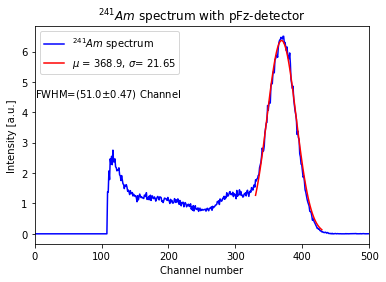

In [47]:
x1=ar(range(1024))
#Am241-pFz minus background noise
B=Abp/300.004000
Bx=Ap/300.308000
Apr=Bx-B
def gaussian(x,A,mu, sig):
    return (A/(np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sig**2)))

popt2,pcov2 = curve_fit(gaussian,x1[330:400],Apr[330:400],p0=[6,370,1])
#popt2,pcov2 = curve_fit(gaussian,x1[280:400],Apr[280:400],p0=[1950,370,1])
#popt21,pcov21 = curve_fit(gaussian,x1[109:130],Apr[109:130],p0=[750,115,1,300,0])
print("mu_right=",popt2[1],", Standardfehler=", np.sqrt(pcov2[1][1]))
print("sig_right=",popt2[2],", Standardfehler=", np.sqrt(pcov2[2][2]))
#print("mu_left=",popt21[1],", Standardfehler=", np.sqrt(pcov21[1][1]))
#print("sig_left=",popt21[2],", Standardfehler=", np.sqrt(pcov21[2][2]))
x_k2=np.arange(330,430)
#x_k21=np.arange(109,130)
plt.xlim(0,500)
plt.plot(x1,Apr, 'b-', label=r'$^{241}Am$ spectrum')
plt.plot(x_k2,gaussian(x_k2,*popt2),'r',label=r'$\mu$ = {:1.4}, $\sigma$= {:1.4}'.format(popt2[1],popt2[2]))
plt.title(r'$^{241}Am$ spectrum with pFz-detector')
plt.xlabel('Channel number')
plt.ylabel('Intensity [a.u.]')
plt.legend(loc='best')
sig2=popt2[2]
sig_err2 = np.sqrt(pcov2[2][2])
FWHM2= 2*np.sqrt(2*np.log(2))*sig2
FWHM_err2= 2*np.sqrt(2*np.log(2))*sig_err2
print(FWHM2)
plt.text(x=.2, y=4.5,s=r'FWHM=({:1.3}$\pm${:1.2}) Channel'. format(FWHM2,FWHM_err2))
#plt.savefig('C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/Am_pFz.pdf', format='pdf')
plt.show()

mu_right= 249.64527105123236 , Standardfehler= 0.3293815914474919
sig_right= 21.769659166317197 , Standardfehler= 0.4046449863004461


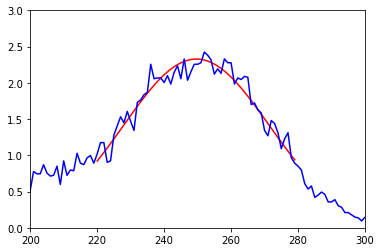

In [27]:
#Am241-nMCZ without substracting background noise
C=AbnC/155.215000
Cx=AnC/95.287000
AnCr=Cx-C
def gaussian(x,A,mu, sig):
    return (A/(np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sig**2)))

popt3,pcov3 = curve_fit(gaussian,x1[220:290],AnCr[220:290],p0=[3,250,1])
print("mu_right=",popt3[1],", Standardfehler=", np.sqrt(pcov3[1][1]))
print("sig_right=",popt3[2],", Standardfehler=", np.sqrt(pcov3[2][2]))
x_k3=np.arange(220,280)
plt.xlim(200,300)
#plt.xlim(0,310)
plt.ylim(0,3)
plt.plot(x_k3,gaussian(x_k3,*popt3),'r',label='fit')
plt.plot(x1,AnCr, 'b-', label='Am241-nMCZ')
#plt.savefig('C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/Am_nMCz.pdf', format='pdf')
plt.show()